# Задание 1

Реализуйте стохастический градиентный спуск для решения линейной регрессии. Исследуйте сходимость с разным размером батча (1 - SGD, 2, $\ldots$, $n - 1$ - Minibatch GD, $n$ - GD из предыдущей работы).

In [3]:
import sys
sys.path.append('..' + '/')

from helper import *

In [4]:
class get_model_LinearRegression:
    def __init__(self, batch_size=None):
        self.coef_ = []
        self.intercept_ = None
        self.batch_size = batch_size

    def fit(self, X_train, y_train, epsilon=24, learning_rate=0.01, max_epochs=100, batch_size=1, apply_min=True):
        X = X_train 
        y = y_train

        if self.batch_size is not None:
            batch_size = self.batch_size

        def mse_loss(w):
            y_pred = np.dot(X, w)
            mse = np.mean((y_pred - y)**2)
            return mse

        x0 = np.zeros(X.shape[1], dtype=float)

        point, _, _ = stochastic_gradient_descent(mse_loss, x0, epsilon=epsilon, learning_rate=learning_rate, max_epochs=max_epochs, batch_size=batch_size, apply_min=apply_min)

        self.coef_ = point[:-1]
        self.intercept_ = point[-1] 

    def predict(self, X_test):
        y_pred = []

        for i in range(len(X_test)):
            y = self.intercept_ + sum([self.coef_[j] * float(X_test[i][j]) for j in range(len(self.coef_))])
            y_pred.append(y)
        return y_pred

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True , parser='liac-arff')
model = LinearRegression()

mse_reference, r2_reference = train_test_print_model(model, boston, print_result=False, print_info=False, view_graphics=False)

print(mse_reference, r2_reference)

ImportError: Returning pandas objects requires pandas to be installed. Alternatively, explicitely set `as_frame=False` and `parser='liac-arff'`.

In [ ]:
from tqdm import tqdm

from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True , parser='liac-arff')

n_tests = 1

mse_results = []
r2_results = []

for i in range(1, boston.data.values.shape[1] + 1):
    model = get_model_LinearRegression(batch_size=i)
    # mse_sum = 0
    # r2_sum = 0
    # for i in range(n_tests):
    #     mse, r2 = train_test_print_model(model, boston, print_result=False, view_graphics=False)
    #     mse_sum += mse
    #     r2_sum += r2
    mse = mse_reference/2
    r2 = r2_reference/2
    tries = 0
    while mse <= mse_reference/2 or r2 <= r2_reference/2:
        mse, r2 = train_test_print_model(model, boston, print_result=False, view_graphics=False)
        tries += 1
        tqdm.write(f"Batch size: {i}, Try: {tries}, MSE: {mse}, R^2: {r2}")

    mse_results.append(mse)
    r2_results.append(r2)

Batch size: 1, Try: 1, MSE: 85.33439280153814, R^2: -0.16364367313465
Batch size: 1, Try: 2, MSE: 49.101756233851354, R^2: 0.3304347039275928
Batch size: 1, Try: 3, MSE: 78.14745449523187, R^2: -0.06564057010921176
Batch size: 1, Try: 4, MSE: 47.6320254232416, R^2: 0.3504763647729989
Batch size: 2, Try: 1, MSE: 38.51352259466468, R^2: 0.47481882244550133
Batch size: 3, Try: 1, MSE: 71.13831804373982, R^2: 0.02993797704099621
Batch size: 3, Try: 2, MSE: 46.08470121370621, R^2: 0.37157611093163667
Batch size: 4, Try: 1, MSE: 758.5592328115381, R^2: -9.343926088650974
Batch size: 4, Try: 2, MSE: 69.6167137409373, R^2: 0.0506869993500727
Batch size: 4, Try: 3, MSE: 116.48727081151222, R^2: -0.5884530402154042
Batch size: 4, Try: 4, MSE: 55.65789951002449, R^2: 0.24103329855020972
Batch size: 4, Try: 5, MSE: 108.08166998255045, R^2: -0.47383191381605627
Batch size: 4, Try: 6, MSE: 315.8274030938619, R^2: -3.306710897532686
Batch size: 4, Try: 7, MSE: 82.42795269425557, R^2: -0.1240106420536

KeyboardInterrupt: 

In [ ]:
mse_ideal = 0.0
r2_ideal = 1.0

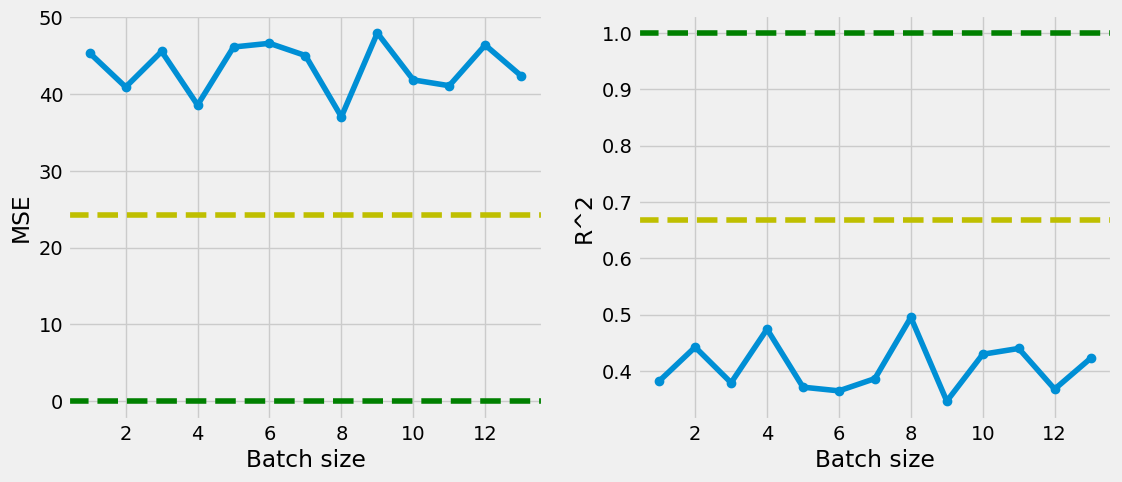

In [ ]:
# Строим графики
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# График MSE
axs[0].plot(range(1, len(mse_results)+1), mse_results, marker='o')
axs[0].set_xlabel('Batch size')
axs[0].set_ylabel('MSE')
axs[0].axhline(y=mse_reference, color='y', linestyle='--', label='MSE reference')
axs[0].axhline(y=mse_ideal, color='g', linestyle='--', label='MSE ideal')

# График R^2
axs[1].plot(range(1, len(r2_results)+1), r2_results, marker='o')
axs[1].set_xlabel('Batch size')
axs[1].set_ylabel('R^2')
axs[1].axhline(y=r2_reference, color='y', linestyle='--', label='R^2 reference')
axs[1].axhline(y=r2_ideal, color='g', linestyle='--', label='R^2 ideal')

plt.show()